# Simple Linear Regression

In [58]:
import seaborn as sns
import pandas as pd
import numpy as np

In [59]:
ad = pd.read_csv('original.csv', usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [62]:
df.isnull().values.any()

False

In [63]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


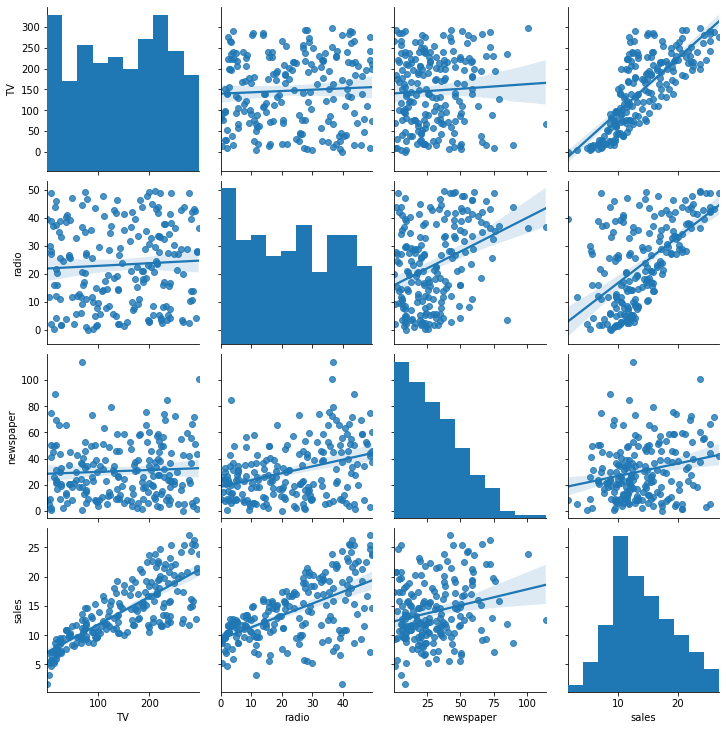

In [64]:
sns.pairplot(df, kind='reg');

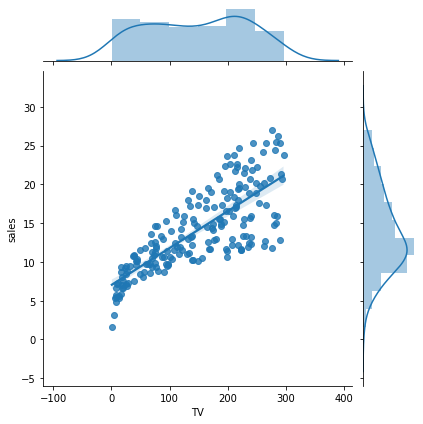

In [65]:
sns.jointplot(x = 'TV', y = 'sales', data=df, kind='reg');

### Modelling with Statsmodels

In [66]:
import statsmodels.api as sm

In [67]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [68]:
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [69]:
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [70]:
lm = sm.OLS(y,X)

In [71]:
model = lm.fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        01:16:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        01:16:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [75]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Wed, 08 Apr 2020",Prob (F-statistic):,1.47e-42
Time:,01:16:46,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [76]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [77]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [78]:
model.f_pvalue

1.4673897001947095e-42

In [79]:
print('f_pvalue :', '%.3f' % model.f_pvalue)

f_pvalue : 0.000


In [80]:
print('f_value :', '%.3f' % model.fvalue)

f_value : 312.145


In [81]:
print('t_value :', '%.2f' % model.tvalues[0:1])

t_value : 15.36


In [82]:
model.mse_model

3314.6181668686486

In [83]:
model.rsquared

0.611875050850071

In [84]:
model.rsquared_adj

0.6099148238341623

In [85]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [86]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [87]:
print('Sales = ' + str('%.2f' % model.params[0]) + ' + TV' + ' * '+ str('%.2f' % model.params[1]))

Sales = 7.03 + TV * 0.05


In [88]:
import matplotlib.pyplot as plt

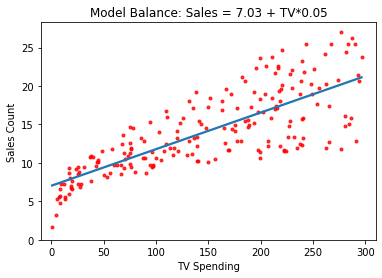

In [89]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Balance: Sales = 7.03 + TV*0.05")
g.set_ylabel("Sales Count")
g.set_xlabel("TV Spending")

plt.xlim(-10,310)
plt.ylim(bottom=0);

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X, y)

In [92]:
model.intercept_

7.032593549127693

In [93]:
model.coef_

array([0.04753664])

In [94]:
model.score(X,y)

0.611875050850071

In [95]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [96]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

### Predict

Sales = 7.03 + TV * 0.04

For example, when spend for 30 unit tv, what will be predict value of sales

In [97]:
7.03 + 30 * 0.04

8.23

In [98]:
model.predict([[30]])

array([8.45869276])

In [99]:
new_data = [[5],[90],[200]]

In [100]:
model.predict(new_data)

array([ 7.27027675, 11.31089119, 16.53992164])

### Leftovers and Importance in Machine Learning

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
lm = smf.ols('sales ~ TV', df)
model = lm.fit()

In [103]:
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [104]:
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [105]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [106]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [107]:
r_p = pd.DataFrame({'real_y': y[0:10],
                    'predict': reg.predict(X)[0:10]})
r_p

,real_y,predict
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [108]:
r_p['error'] = r_p['real_y'] - r_p['predict']
r_p

,real_y,predict,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [109]:
r_p['square_error'] = r_p['error'] ** 2
r_p

,real_y,predict,error,square_error
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [110]:
np.sum(r_p['square_error'])

92.90350329638103

In [111]:
np.mean(r_p['square_error'])

9.290350329638105

In [112]:
np.sqrt(np.mean(r_p['square_error']))

3.048007599996776

In [113]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

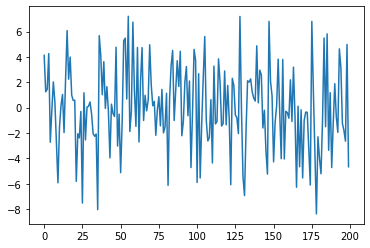

In [114]:
plt.plot(model.resid);

## Multiple Linear Regression

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [116]:
ad = pd.read_csv("original.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [118]:
X = df.drop('sales', axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [119]:
y = df['sales']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [133]:
X_train.shape

(160, 3)

In [130]:
y_train.shape

(160,)

In [132]:
X_test.shape

(40, 3)

In [131]:
y_test.shape

(40,)

In [134]:
training = df.copy()

### Statsmodels

In [135]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):                   1.28e-137
Time:                        01:27:37   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


### scikit-learn model

In [139]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [140]:
model.intercept_

2.979067338122629

In [141]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

### Prediction

In [142]:
new_data = [[11],[33],[44]]
new_data = pd.DataFrame(new_data).T
new_data

,0,1,2
0,11,33,44


In [143]:
model.predict(new_data)

array([9.83601785])

In [145]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [147]:
rmse # train error

1.644727765644337

In [148]:
t_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
t_rmse

1.7815996615334502

### Model Tuning

In [180]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [181]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train))) # train score

1.644727765644337

In [182]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test))) # test score

1.7815996615334502

In [183]:
model.score(X_train, y_train)

0.8957008271017818

In [184]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean()

0.791354859691634

In [185]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6513523730313335

In [186]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.8462778823997095